In [10]:
from sklearn.datasets import load_iris

In [11]:
d=load_iris()

In [12]:
x=d.data
y=d.target

In [13]:
import pandas as pd

In [14]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
df=pd.DataFrame(d.data)

In [16]:
df['Target']=d.target

In [17]:
df.head()

,0,1,2,3,Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
df=df.sample(frac=1)
df

,0,1,2,3,Target
88,5.6,3.0,4.1,1.3,1
110,6.5,3.2,5.1,2.0,2
42,4.4,3.2,1.3,0.2,0
14,5.8,4.0,1.2,0.2,0
27,5.2,3.5,1.5,0.2,0
...,...,...,...,...,...
22,4.6,3.6,1.0,0.2,0
87,6.3,2.3,4.4,1.3,1
18,5.7,3.8,1.7,0.3,0
106,4.9,2.5,4.5,1.7,2


In [19]:
df['Target']

88     1
110    2
42     0
14     0
27     0
      ..
22     0
87     1
18     0
106    2
55     1
Name: Target, Length: 150, dtype: int32

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X=df.drop('Target',axis=1)
y=df['Target']

In [22]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [24]:
s=SVC(kernel='rbf')

In [25]:
parms={'C':[0.1,10,100],'kernel':['rbf','poly']}
g_svm=GridSearchCV(s,parms,cv=2)

In [26]:
g_svm.fit( X_train, y_train)

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 10, 100], 'kernel': ['rbf', 'poly']})

In [27]:
g_svm.best_params_

{'C': 0.1, 'kernel': 'poly'}

In [28]:
pd.DataFrame(g_svm.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009983,0.008926,0.003391,0.003391,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.679245,0.711538,0.695392,0.016147,6
1,0.003264,0.003264,0.004008,0.004008,0.1,poly,"{'C': 0.1, 'kernel': 'poly'}",0.962264,0.961538,0.961901,0.000363,1
2,0.004235,0.000813,0.001022,0.001022,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.962264,0.961538,0.961901,0.000363,1
3,0.001767,0.001767,0.000000,0.000000,10,poly,"{'C': 10, 'kernel': 'poly'}",0.962264,0.961538,0.961901,0.000363,1
4,0.000000,0.000000,0.000000,0.000000,100,rbf,"{'C': 100, 'kernel': 'rbf'}",0.905660,0.923077,0.914369,0.008708,5
5,0.006290,0.006290,0.001197,0.001197,100,poly,"{'C': 100, 'kernel': 'poly'}",0.924528,0.961538,0.943033,0.018505,4


In [29]:
y_pred=g_svm.predict(X_test)

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        17
           2       1.00      0.92      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.98        45
weighted avg       0.98      0.98      0.98        45



In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
dtc=DecisionTreeClassifier(max_depth=5)

In [34]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [35]:
from sklearn import tree
import matplotlib.pyplot as plt

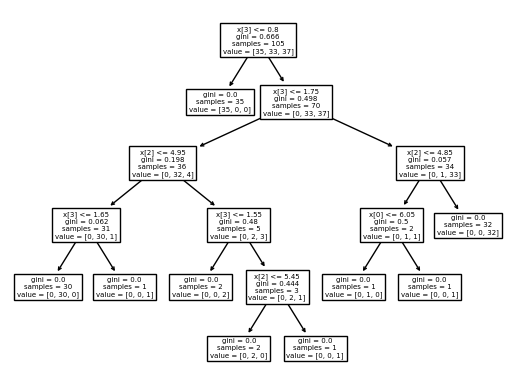

In [36]:
tree.plot_tree(dtc)
plt.show()